# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)


x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alphas = [0.1, 0.01, 0.001]

for alpha in alphas: 
    w = np.linalg.inv(x.T*x + alpha * I)*x.T*y
    w = w.ravel()

    # print the results for each alpha
    print(f"alpha = {alpha}, w = {w}")

alpha = 0.1, w = [[-101.72397081    1.16978757]]
alpha = 0.01, w = [[-167.85534019    1.54416013]]
alpha = 0.001, w = [[-179.52628555    1.61022985]]


## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

SGD results: 0.6213872782501703 -0.21251852002443875


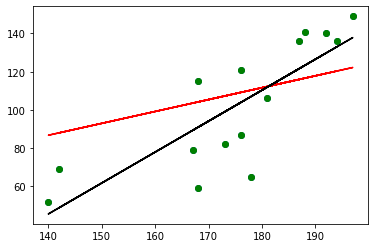

In [63]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


def SGD(X, y, lr=0.05, epoch=10, batch_size=1):
        
    m, b = 0.5, 0.5 
    log, mse = [], [] 
    
    for _ in range(epoch):
        
        indexes = np.random.randint(0, len(X), batch_size) # random sample
        
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)
        
        f = ys - (m*Xs + b)
        
        
        m -= lr * (-2 * Xs.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)    
    
    return m, b




x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x_m = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1)
y_m = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])


scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

m,b = SGD(x, y,lr=0.1, epoch=50000, batch_size=2)
print('SGD results:',m,b)
x = scaler.inverse_transform(x)
y = scaler.inverse_transform(y)

plt.scatter(x_m, y_m)
plt.plot(x_m, m * x_m + b, color='r')

alpha = 0.1


lasso_regression = Lasso(alpha=alpha)
lasso_regression.fit(X=x_m, 
                      y=y_m)
plt.scatter(x_m, y_m,color='g')
plt.plot(x_m, lasso_regression.predict(x_m),color='k')

plt.show()

## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

x = np.c_[iris_df['sepal width (cm)'].values,iris_df['petal width (cm)'].values]
x = np.c_[iris_df['sepal width (cm)'].values,iris_df['petal width (cm)'].values]

dataset_size = np.size(x)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x

y_pred = a * x + b
print(y_pred)
print()

[ 0.64501512  1.04597696  0.88559222  0.96578459  0.56482275  0.32424565
  0.72520749  0.72520749  1.12616932  0.96578459  0.48463039  0.72520749
  1.04597696  1.04597696  0.24405328 -0.07671619  0.32424565  0.64501512
  0.40443802  0.40443802  0.72520749  0.48463039  0.56482275  0.80539985
  0.72520749  1.04597696  0.72520749  0.64501512  0.72520749  0.88559222
  0.96578459  0.72520749  0.16386092  0.08366855  0.96578459  0.88559222
  0.64501512  0.56482275  1.04597696  0.72520749  0.64501512  1.60732353
  0.88559222  0.64501512  0.40443802  1.04597696  0.40443802  0.88559222
  0.48463039  0.80539985  0.88559222  0.88559222  0.96578459  1.60732353
  1.20636169  1.20636169  0.80539985  1.52713116  1.12616932  1.28655406
  1.84790063  1.04597696  1.6875159   1.12616932  1.12616932  0.96578459
  1.04597696  1.28655406  1.6875159   1.44693879  0.88559222  1.20636169
  1.44693879  1.20636169  1.12616932  1.04597696  1.20636169  1.04597696
  1.12616932  1.36674643  1.52713116  1.52713116  1